
The Perceptron algorithm is a supervised learning algorithm for binary classification, meaning it is used to separate data into two classes. The algorithm aims to find a hyperplane that separates the data points of different classes in the feature space.

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np

## Generate synthetic dataset for binary classification using perceptron algorithm.
The generated dataset consists of two parts: X (the input features) and y(the corresponding target labels). Generate 100 samples for each class, a total of 200 samples.

The first class has a center at (0.5, 0.5) and the second class has a center at (-0.5, -0.5).

The first class has a cluster standard deviation of 0.22, and the second class has a cluster standard deviation of 0.28.


In [34]:
X, y = make_blobs(n_samples=[100,100], centers=[[0.5,0.5],[-0.5,-0.5]], n_features=2, random_state=22,cluster_std= [0.22,0.28])
#X

In [3]:
print(X.shape)

(200, 2)


### Create a scatter plot of the generated dataset

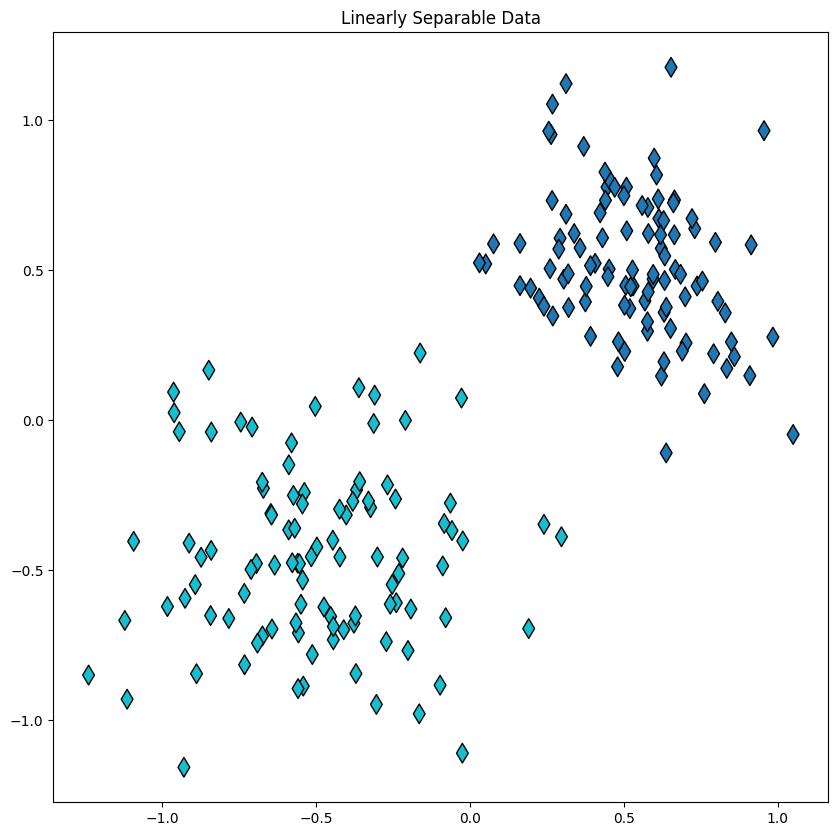

In [33]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], marker="d", c=y, s=100, edgecolor="black", cmap="tab10")
plt.title("Linearly Separable Data")
plt.show()

# Perceptron class
This Perceptron class provides the basic functionalities for training and making predictions with a perceptron model. By using the fit method, you can train the perceptron on a given dataset, and then use the predict method to make predictions on new, unseen data.

## Initialization (__init__ method):
The __init__ method is a special method that initializes the object of the perceptron class. It takes two optional parameters: learning_rate and n_iters. learning_rate (default value: 1) determines the step size for updating the weights during training. n_iters (default value: 100) specifies the number of training iterations. Other attributes of the class include activation_func, weights, and bias, which are initialized as None. These will be set during training.

## Fit (fit method):
The fit method is used to train the perceptron model.
It takes two parameters: X (the input features) and y (the target labels).
It initializes the weights and bias to zeros, and converts the target labels (y) to a binary array (y_) where values greater than 0 are set to 1 and others to 0. The method then iterates n_iters times and for each iteration, it loops through each training example.

For each training example, it computes the linear combination of the input features and weights, adds the bias term, and applies the activation function (_unit_step_func) to get the predicted output.
It calculates the update value based on the difference between the predicted output and the target label, multiplied by the learning rate.
The weights and bias are updated by adding the update value multiplied by the input features and 1, respectively.

## Predict (predict method):
The predict method takes the input features (X) as a parameter and returns the predicted output labels.
It computes the linear combination of the input features and weights, adds the bias term, and applies the activation function to obtain the predicted output.

## Activation Function (_unit_step_func method):
The _unit_step_func method is a private method that serves as the activation function for the perceptron.
It takes a scalar or an array (x) as input and returns 1 where the input is greater than or equal to 0, and 0 otherwise.

In [18]:
class perceptron:

    def __init__(self,learning_rate = 1, n_iters = 100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i>0 else 0 for i in y])

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted


    def _unit_step_func(self,x):
        return np.where(x>=0,1,0)

In [19]:
"Split the dataset into training and testing sets. The Split is 80-20"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [20]:
"Call the perceptron class to train a perceptron model and make predictions on the test data."

p = perceptron(learning_rate=1, n_iters=2)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

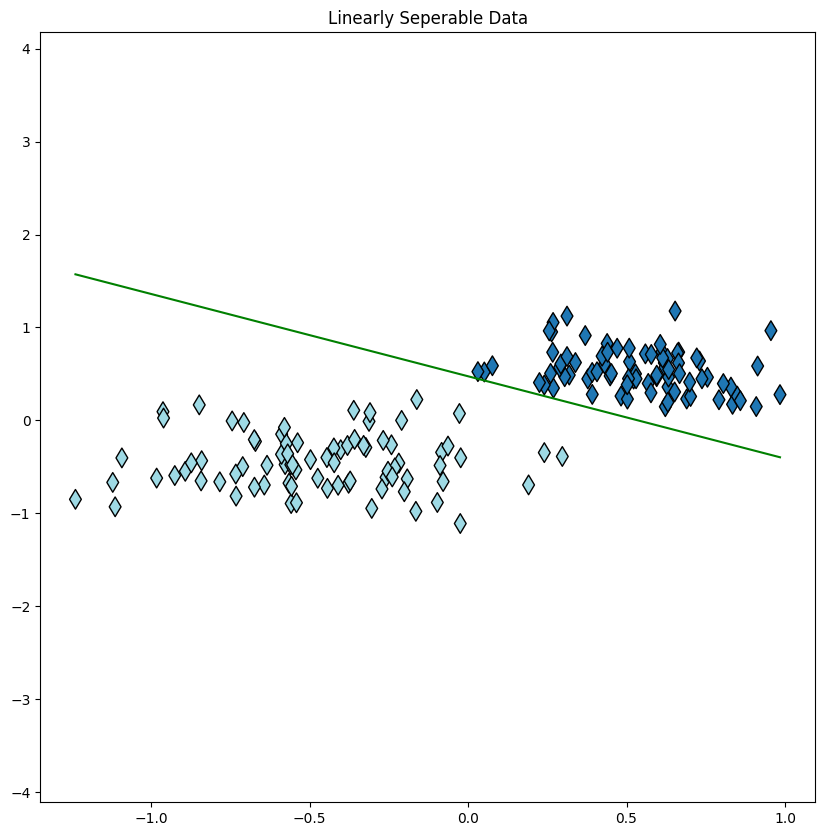

In [29]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="d", c=y_train, s=100, edgecolor="black", cmap="tab20")
plt.title("Linearly Seperable Data")

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "g")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

In [35]:
'Generate synthetic dataset for binary classification using perceptron algorithm with higher standard deviation between points.'

X, y = make_blobs(n_samples=[100,100], centers=[[0.5,0.5],[-0.5,-0.5]], n_features=2, random_state=0,cluster_std= [2,1])

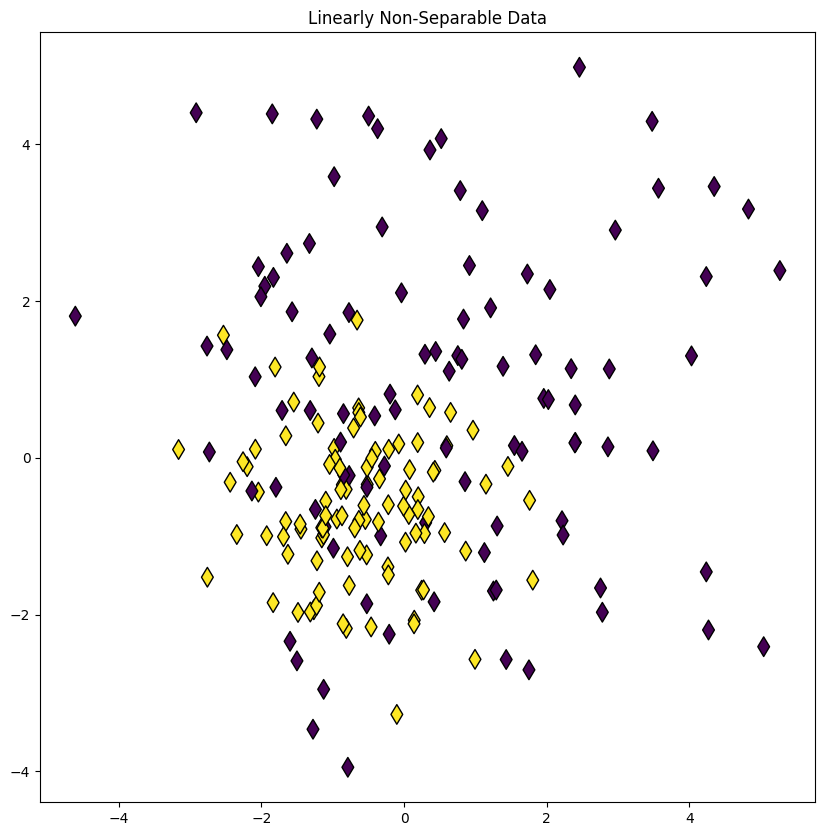

In [39]:
'Lets plot the new synthetic data we have generated.'

fig = plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], marker="d", c=y, s=100, edgecolor="k")
plt.title("Linearly Non-Separable Data")
plt.show()

In [40]:
"Split the new dataset into training and testing sets. The Split is 80-20"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [41]:
"Call the perceptron class to train a perceptron model and make predictions on the new test data."

p = perceptron(learning_rate=1, n_iters=100)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

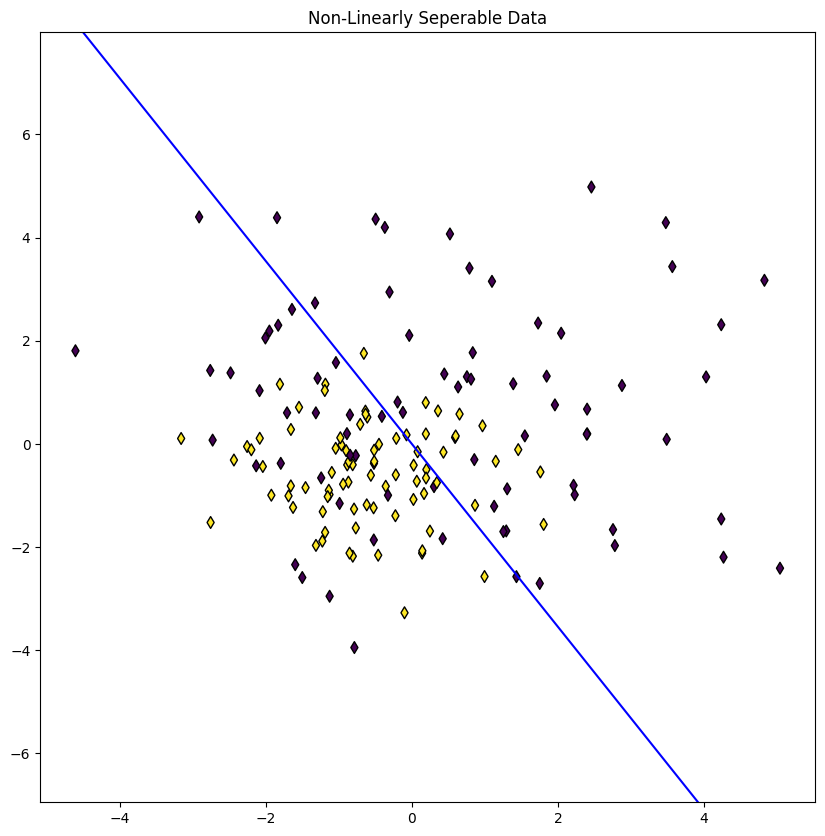

In [45]:
'Plot the linearly non-separable data.'
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="d", c=y_train,edgecolor="k")
plt.title("Non-Linearly Seperable Data")

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "b")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()